# 1.7.1 Camera Calibration

In [1]:
import numpy as np
import cv2
import glob
from matplotlib import pyplot as plt

In [2]:
# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

In [3]:
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((7*7,3), np.float32)
objp[:,:2] = np.mgrid[0:7,0:7].T.reshape(-1,2)

In [4]:
# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.
images = glob.glob('.\image\*.png') #('.\Image\*.png')

In [5]:
len(images)

26

In [6]:
for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    # Find the chess board corners
    ret, corners = cv2.findChessboardCorners(gray, (7,7),None) #(7,6)
    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)
        corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
        imgpoints.append(corners2)
        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (7,7), corners2,ret)
        cv2.imshow('img',img)
        cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
cv2.imshow('img',img)

: 

## Calibration

In [7]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1],None,None)

In [8]:
mtx

array([[959.58083877,   0.        , 621.36050206],
       [  0.        , 964.45261798, 382.43694501],
       [  0.        ,   0.        ,   1.        ]])

In [9]:
dist

array([[-0.01662581, -0.37577532,  0.00375292,  0.00581156,  0.93560367]])

In [10]:
print(rvecs)

(array([[0.00909977],
       [0.43198961],
       [3.08249871]]), array([[-0.24025415],
       [-0.23481116],
       [-0.01561179]]), array([[-0.28629515],
       [-0.51634419],
       [ 0.00690838]]), array([[0.05592612],
       [0.5569803 ],
       [1.56662763]]), array([[-0.29403733],
       [ 0.06545691],
       [ 0.02734996]]), array([[0.20191943],
       [0.07515945],
       [0.02766565]]), array([[-1.07556707],
       [ 0.05625479],
       [ 0.05371552]]), array([[-0.17040198],
       [ 0.33673589],
       [ 0.0812957 ]]), array([[-0.22236935],
       [ 0.05653673],
       [ 0.03505454]]), array([[0.41104146],
       [0.83312339],
       [1.50802432]]), array([[-0.21945051],
       [-0.28438842],
       [ 0.00131204]]), array([[-0.04601132],
       [-0.25999436],
       [-3.11801825]]), array([[-0.16708388],
       [ 0.03705035],
       [ 0.017624  ]]), array([[-0.22249308],
       [ 0.08693125],
       [ 0.0252295 ]]), array([[0.26919314],
       [0.00811139],
       [0.0301445

In [11]:
tvecs

(array([[ 2.67404694],
        [ 3.88594738],
        [20.9568351 ]]),
 array([[-5.61316079],
        [-1.44154329],
        [21.85478663]]),
 array([[-8.05942636],
        [-1.11640824],
        [20.82101264]]),
 array([[ 5.51913719],
        [-1.00152222],
        [20.4987119 ]]),
 array([[-3.29113793],
        [-1.1655674 ],
        [21.78334112]]),
 array([[-3.46928241],
        [-0.9032854 ],
        [19.07607783]]),
 array([[-3.12432583],
        [ 1.59110747],
        [21.64219915]]),
 array([[-1.89773625],
        [-1.40405987],
        [20.5855305 ]]),
 array([[-4.06156494],
        [-1.58202238],
        [20.30166941]]),
 array([[ 4.19799152],
        [-1.29639585],
        [18.25050686]]),
 array([[-5.17823255],
        [-1.8415857 ],
        [19.29606408]]),
 array([[ 2.08361502],
        [ 3.75647276],
        [18.88666029]]),
 array([[-3.87973392],
        [-2.13601184],
        [18.50109018]]),
 array([[-3.6813038 ],
        [-1.66009763],
        [23.41889344]]),
 array

## Undistortion

In [12]:
img = cv2.imread('./image/image56.png')
h, w = img.shape[:2]
newcameramtx, roi=cv2.getOptimalNewCameraMatrix(mtx,dist,(w,h),1,(w,h))

## 1. Using cv2.undistort()

In [13]:
# undistort
dst = cv2.undistort(img, mtx, dist, None, newcameramtx)
# crop the image
x,y,w,h = roi
dst = dst[y:y+h, x:x+w]
cv2.imwrite('calibresult.png',dst)

True

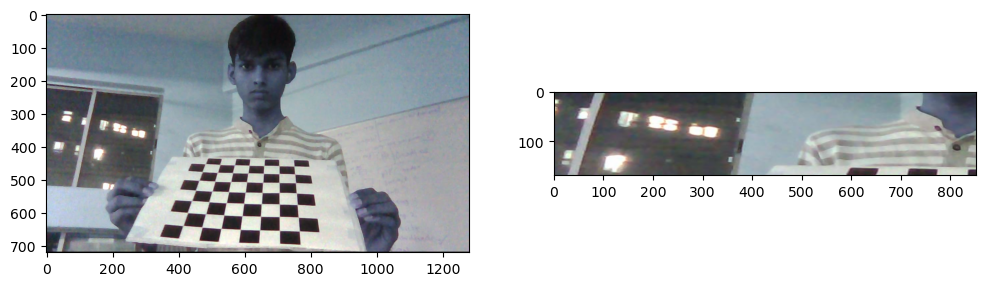

In [52]:
plt.figure(figsize=(12,8))
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(dst)
plt.show()

## 2. Using remapping

In [14]:
# undistort
mapx,mapy = cv2.initUndistortRectifyMap(mtx,dist,None,newcameramtx,(w,h),5)
dst = cv2.remap(img,mapx,mapy,cv2.INTER_LINEAR)
#dst = cv2.undistort(img, mtx, dist, None, newcameramtx)
# crop the image
x,y,w,h = roi
dst = dst[y:y+h, x:x+w]
cv2.imwrite('calibresult.png',dst)

True

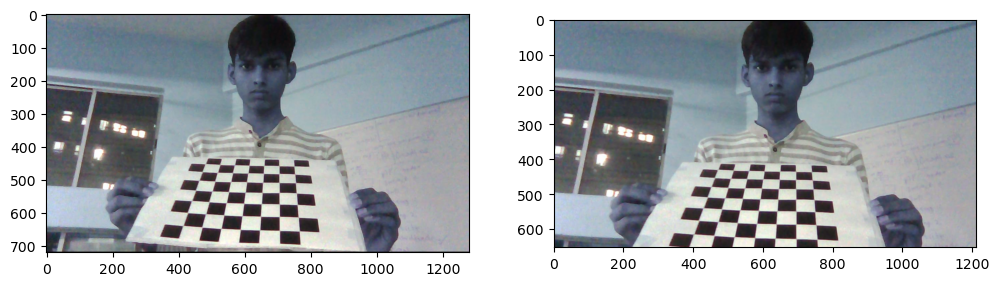

In [15]:
plt.figure(figsize=(12,8))
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(dst)
plt.show()

## Re-projection Error

In [16]:
tot_error = 0
for i in range(len(objpoints)):
    imgpoints2, _ = cv2.projectPoints(objpoints[i], rvecs[i], tvecs[i], mtx, dist)
    error = cv2.norm(imgpoints[i],imgpoints2, cv2.NORM_L2)/len(imgpoints2)
    tot_error += error
print("mean error: ", tot_error/len(objpoints))

mean error:  0.08890725956558454
